In [1]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("vaers_cleaned.csv")

# Shape
print("Shape:", df.shape)

# Column info
print(df.info())

# Missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

Shape: (1026762, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026762 entries, 0 to 1026761
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1026762 non-null  int64  
 1   YEAR             1026762 non-null  int64  
 2   AGE_YRS          921908 non-null   float64
 3   SEX              1026528 non-null  object 
 4   VAX_TYPE         1026762 non-null  object 
 5   VAX_NAME         1026762 non-null  object 
 6   VAX_MANU         1026762 non-null  object 
 7   SYMPTOM_TEXT     1025267 non-null  object 
 8   SYMPTOMS_STRUCT  1026762 non-null  object 
 9   HOSPITAL         92395 non-null    object 
 10  L_THREAT         16462 non-null    object 
 11  DIED             19751 non-null    object 
 12  DISABLE          20031 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 101.8+ MB
None
L_THREAT        1010300
DIED            1007011
DISABLE         1006731
HOSP

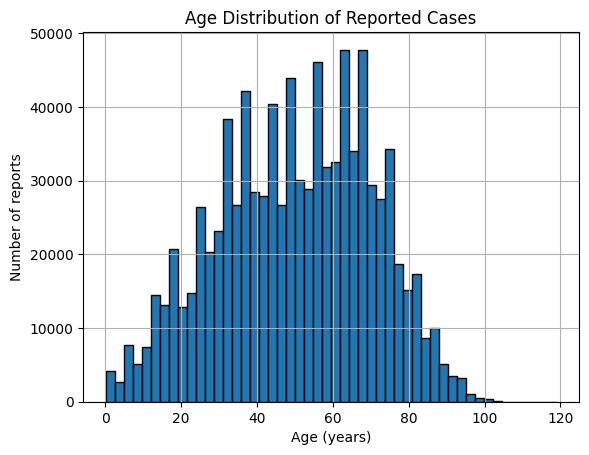

In [2]:
import matplotlib.pyplot as plt

df["AGE_YRS"].dropna().hist(bins=50, edgecolor="black")
plt.title("Age Distribution of Reported Cases")
plt.xlabel("Age (years)")
plt.ylabel("Number of reports")
plt.show()


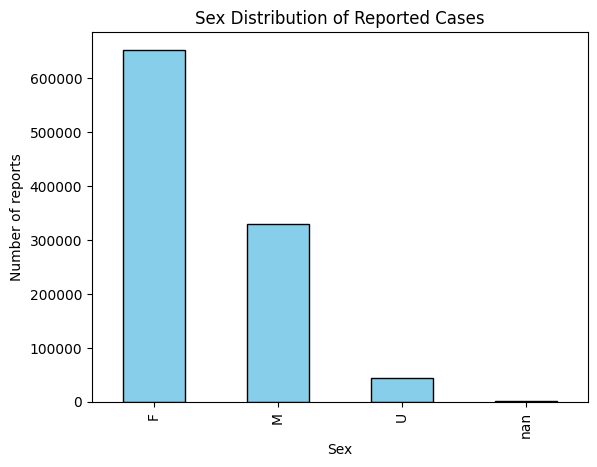

In [3]:
df["SEX"].value_counts(dropna=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Sex Distribution of Reported Cases")
plt.xlabel("Sex")
plt.ylabel("Number of reports")
plt.show()


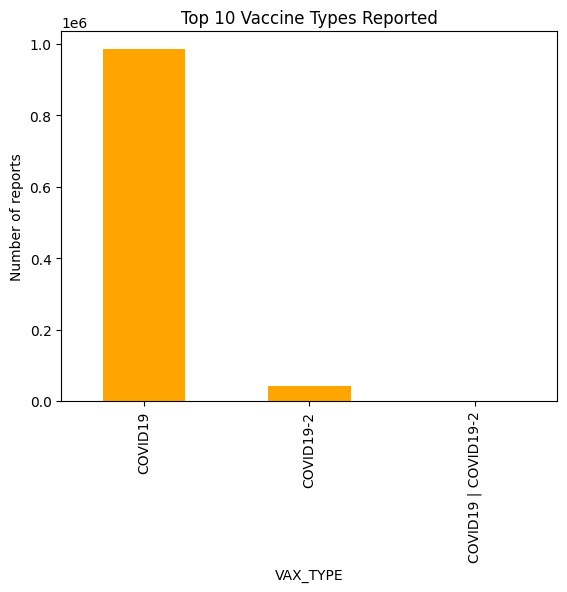

In [4]:
df["VAX_TYPE"].unique()
df["VAX_TYPE"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Vaccine Types Reported")
plt.ylabel("Number of reports")
plt.show()


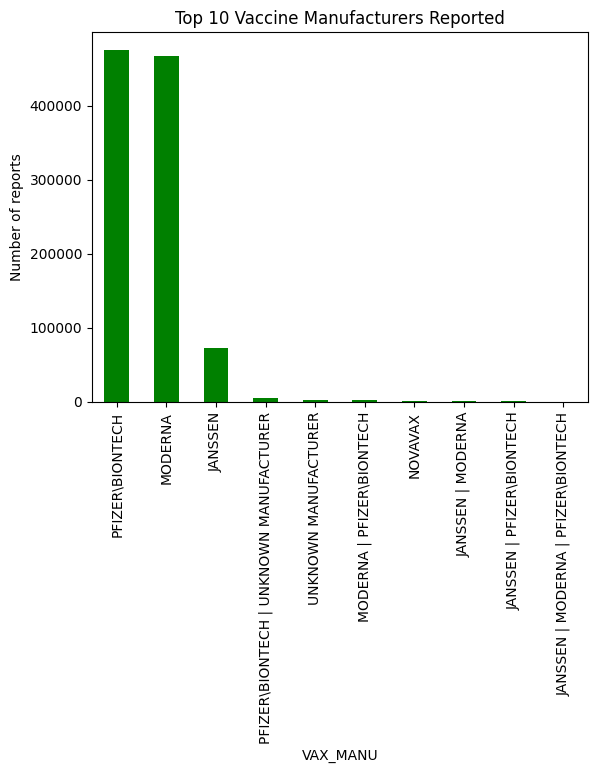

In [8]:
df["VAX_MANU"].value_counts().head(10).plot(kind="bar", color="green")
plt.title("Top 10 Vaccine Manufacturers Reported")
plt.ylabel("Number of reports")
plt.show()


In [5]:
df["VAX_NAME"].unique()

array(['COVID19 (COVID19 (MODERNA))',
       'COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (JANSSEN))', 'COVID19 (COVID19 (UNKNOWN))',
       'COVID19 (COVID19 (MODERNA)) | COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (PFIZER-BIONTECH)) | COVID19 (COVID19 (UNKNOWN))',
       'COVID19 (COVID19 (MODERNA)) | COVID19 (COVID19 (UNKNOWN))',
       'COVID19 (COVID19 (JANSSEN)) | COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (JANSSEN)) | COVID19 (COVID19 (UNKNOWN))',
       'COVID19 (COVID19 (JANSSEN)) | COVID19 (COVID19 (MODERNA))',
       'COVID19 (COVID19 (MODERNA)) | COVID19 (COVID19 (PFIZER-BIONTECH)) | COVID19 (COVID19 (UNKNOWN))',
       'COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)) | COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (MODERNA BIVALENT)) | COVID19 (COVID19 (MODERNA))',
       'COVID19 (COVID19 (JANSSEN)) | COVID19 (COVID19 (MODERNA)) | COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (MODERNA

In [6]:
from collections import Counter
import re

# Join all symptom texts
all_symptoms = " ".join(df["FINAL_SYMPTOM_TEXT"].dropna().astype(str))

# Simple tokenization (lowercase, keep words only)
tokens = re.findall(r"\b[a-z]{4,}\b", all_symptoms.lower())

# Count frequencies
common_words = Counter(tokens).most_common(20)
print("Top 20 symptom words:", common_words)


Top 20 symptom words: [('patient', 2003753), ('covid', 1649011), ('vaccine', 1338905), ('pain', 1042195), ('dose', 979726), ('unknown', 850936), ('with', 833198), ('received', 810877), ('reported', 768951), ('this', 625980), ('site', 610386), ('vaccination', 585070), ('after', 571286), ('that', 567831), ('injection', 567248), ('moderna', 541967), ('mrna', 508787), ('were', 461061), ('headache', 454969), ('date', 432524)]


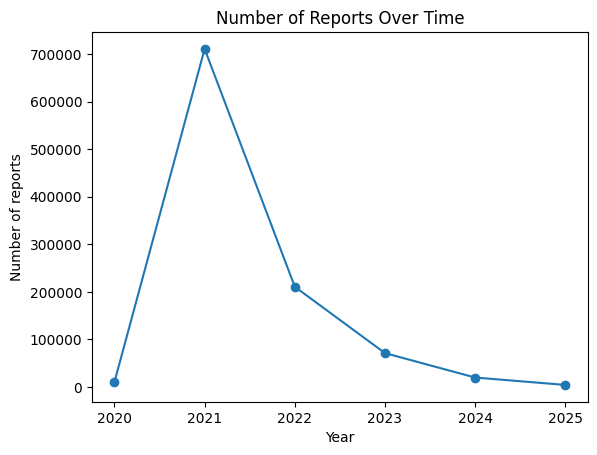

In [7]:
df["YEAR"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Number of Reports Over Time")
plt.xlabel("Year")
plt.ylabel("Number of reports")
plt.show()


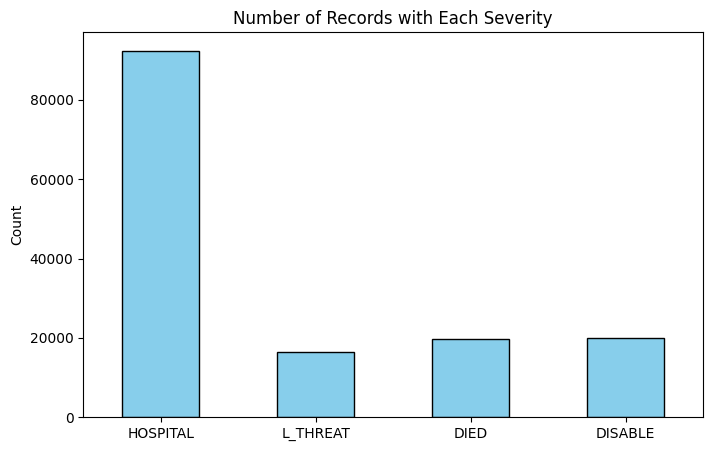

In [9]:
import matplotlib.pyplot as plt

severity_cols = ["HOSPITAL", "L_THREAT", "DIED", "DISABLE"]

# Count non-NaN entries for each severity
severity_counts = df[severity_cols].notna().sum()

# Plot a single bar chart
plt.figure(figsize=(8,5))
severity_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Records with Each Severity")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
